In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
 
#importing libraries
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
 
 

In [3]:
train_data_path = "train"
validation_data_path = "val"

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 

In [5]:

training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), # all images will be resized to 224X224
                                      batch_size=32,
                                      class_mode='categorical')


Found 1951 images belonging to 4 classes.


In [6]:
training_data.class_indices


{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [7]:

valid_datagen = ImageDataGenerator(rescale=1./255)
 
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='categorical')
 



Found 324 images belonging to 4 classes.


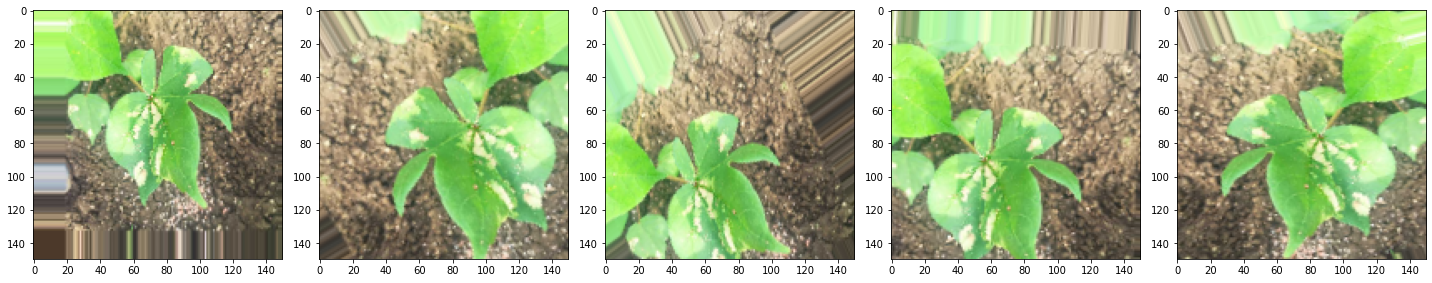

In [8]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [9]:

#Building cnn model
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
    tensorflow.keras.layers.Conv2D(filters=256, kernel_size=3),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tensorflow.keras.layers.Dropout(0.5),                                                                        
    tensorflow.keras.layers.Flatten(), # neural network building
    tensorflow.keras.layers.Dense(units=128, activation='relu'), # input layers
    tensorflow.keras.layers.Dropout(0.1),                                    
    tensorflow.keras.layers.Dense(units=256, activation='relu'),                                    
    tensorflow.keras.layers.Dropout(0.25),                                    
    tensorflow.keras.layers.Dense(units=4, activation='softmax') # output layer
])
 
 
# compile cnn model
model.compile(optimizer = Adam(lr=0.0001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
 
# train cnn model
history = model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          ) # time start 16.06


Epoch 1/500
61/61 [==============================] - 20s 244ms/step - loss: 1.3412 - accuracy: 0.3964 - val_loss: 1.1820 - val_accuracy: 0.4012
Epoch 2/500
61/61 [==============================] - 11s 184ms/step - loss: 1.1321 - accuracy: 0.5175 - val_loss: 1.0130 - val_accuracy: 0.5309
Epoch 3/500
61/61 [==============================] - 11s 180ms/step - loss: 1.0068 - accuracy: 0.5833 - val_loss: 1.1110 - val_accuracy: 0.5093
Epoch 4/500
61/61 [==============================] - 11s 180ms/step - loss: 0.9221 - accuracy: 0.6290 - val_loss: 0.7660 - val_accuracy: 0.6852
Epoch 5/500
61/61 [==============================] - 12s 190ms/step - loss: 0.8443 - accuracy: 0.6645 - val_loss: 0.8475 - val_accuracy: 0.6512
Epoch 6/500
61/61 [==============================] - 12s 195ms/step - loss: 0.8129 - accuracy: 0.6704 - val_loss: 0.8533 - val_accuracy: 0.6698
Epoch 7/500
61/61 [==============================] - 11s 186ms/step - loss: 0.7984 - accuracy: 0.6719 - val_loss: 1.0441 - val_accuracy:

61/61 [==============================] - 11s 185ms/step - loss: 0.1900 - accuracy: 0.9258 - val_loss: 0.1428 - val_accuracy: 0.9475
Epoch 114/500
61/61 [==============================] - 11s 185ms/step - loss: 0.2233 - accuracy: 0.9151 - val_loss: 0.1587 - val_accuracy: 0.9506
Epoch 115/500
61/61 [==============================] - 11s 186ms/step - loss: 0.1976 - accuracy: 0.9215 - val_loss: 0.1505 - val_accuracy: 0.9352
Epoch 116/500
61/61 [==============================] - 11s 186ms/step - loss: 0.2247 - accuracy: 0.9139 - val_loss: 0.0902 - val_accuracy: 0.9846
Epoch 117/500
61/61 [==============================] - 11s 185ms/step - loss: 0.1675 - accuracy: 0.9354 - val_loss: 0.1122 - val_accuracy: 0.9691
Epoch 118/500
61/61 [==============================] - 11s 186ms/step - loss: 0.2010 - accuracy: 0.9205 - val_loss: 0.1207 - val_accuracy: 0.9568
Epoch 119/500
61/61 [==============================] - 11s 186ms/step - loss: 0.1974 - accuracy: 0.9299 - val_loss: 0.1319 - val_accuracy:

61/61 [==============================] - 11s 185ms/step - loss: 0.1324 - accuracy: 0.9578 - val_loss: 0.0980 - val_accuracy: 0.9660
Epoch 226/500
61/61 [==============================] - 11s 184ms/step - loss: 0.1106 - accuracy: 0.9628 - val_loss: 0.0792 - val_accuracy: 0.9784
Epoch 227/500
61/61 [==============================] - 11s 186ms/step - loss: 0.1277 - accuracy: 0.9546 - val_loss: 0.0463 - val_accuracy: 0.9907
Epoch 228/500
61/61 [==============================] - 11s 187ms/step - loss: 0.1261 - accuracy: 0.9601 - val_loss: 0.1185 - val_accuracy: 0.9599
Epoch 229/500
61/61 [==============================] - 11s 184ms/step - loss: 0.1288 - accuracy: 0.9522 - val_loss: 0.1321 - val_accuracy: 0.9444
Epoch 230/500
61/61 [==============================] - 11s 185ms/step - loss: 0.1133 - accuracy: 0.9575 - val_loss: 0.0653 - val_accuracy: 0.9753
Epoch 231/500
61/61 [==============================] - 11s 187ms/step - loss: 0.1178 - accuracy: 0.9581 - val_loss: 0.0490 - val_accuracy:

61/61 [==============================] - 12s 195ms/step - loss: 0.0760 - accuracy: 0.9722 - val_loss: 0.0949 - val_accuracy: 0.9784
Epoch 338/500
61/61 [==============================] - 12s 196ms/step - loss: 0.0622 - accuracy: 0.9748 - val_loss: 0.0881 - val_accuracy: 0.9753
Epoch 339/500
61/61 [==============================] - 12s 189ms/step - loss: 0.0669 - accuracy: 0.9772 - val_loss: 0.2886 - val_accuracy: 0.9043
Epoch 340/500
61/61 [==============================] - 12s 190ms/step - loss: 0.0882 - accuracy: 0.9640 - val_loss: 0.0801 - val_accuracy: 0.9753
Epoch 341/500
61/61 [==============================] - 12s 193ms/step - loss: 0.0901 - accuracy: 0.9829 - val_loss: 0.0550 - val_accuracy: 0.9846
Epoch 342/500
61/61 [==============================] - 12s 191ms/step - loss: 0.0632 - accuracy: 0.9816 - val_loss: 0.0812 - val_accuracy: 0.9722
Epoch 343/500
61/61 [==============================] - 12s 195ms/step - loss: 0.0925 - accuracy: 0.9726 - val_loss: 0.0457 - val_accuracy:

61/61 [==============================] - 12s 204ms/step - loss: 0.0531 - accuracy: 0.9804 - val_loss: 0.0631 - val_accuracy: 0.9722
Epoch 450/500
61/61 [==============================] - 12s 205ms/step - loss: 0.0401 - accuracy: 0.9847 - val_loss: 0.0744 - val_accuracy: 0.9691
Epoch 451/500
61/61 [==============================] - 12s 200ms/step - loss: 0.0578 - accuracy: 0.9818 - val_loss: 0.0763 - val_accuracy: 0.9722
Epoch 452/500
61/61 [==============================] - 12s 190ms/step - loss: 0.0627 - accuracy: 0.9773 - val_loss: 0.1270 - val_accuracy: 0.9537
Epoch 453/500
61/61 [==============================] - 12s 189ms/step - loss: 0.0563 - accuracy: 0.9840 - val_loss: 0.0830 - val_accuracy: 0.9722
Epoch 454/500
61/61 [==============================] - 12s 188ms/step - loss: 0.0517 - accuracy: 0.9820 - val_loss: 0.0610 - val_accuracy: 0.9722
Epoch 455/500
61/61 [==============================] - 11s 188ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.0673 - val_accuracy:

In [10]:
model.save('model.h5')

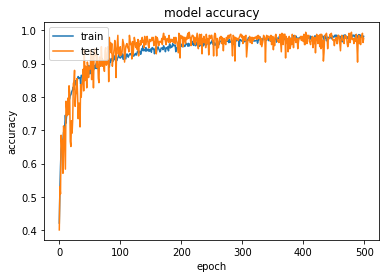

In [11]:
 
# summarize epoch vs accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 


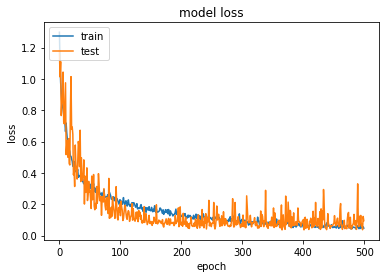

In [12]:
# epoch  vs  loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()